Problem one
====================
One variarion of the perceptron learning rule is  
$$ W^{new} = W^{old} + \alpha ep^T $$  
$$ b^{new} = b^{old} + \alpha e $$  
Prove the covergence:   

**Known:**  
$ a = hardlim(Wp+b) $  
$ e = t - a $  
$ cost = \frac{1}{2}e^2 $  

**Proof:**  
$ cost^{new}-cost^{old} $  

$ = \frac{1}{2}(t-hardlim(W^{new}p + b^{new}))^2 - \frac{1}{2}(t-hardlim(W^{old}p + b^{old}))^2 $

$ = \frac{1}{2}(t-hardlim((W^{old}+\alpha ep^T)p + (b^{old}+\alpha e)))^2 - \frac{1}{2}(t-hardlim(W^{old}p + b^{old}))^2 $
   
$ = \frac{1}{2}(t-hardlim(W^{old}p+ b^{old} + 2 \alpha e ))^2 - \frac{1}{2}(t-hardlim(W^{old}p + b^{old}))^2 $  

$ = \frac{1}{2}(t-H)^2 - \frac{1}{2}(t-a)^2 $  

$ = \frac{1}{2}[H-a][H+a-2t] $  

( Let $ H = hardlim(W^{old}p+ b^{old} + 2 \alpha e) $ )

If $t = a$,  
then $e= t - a = 0$, $H = a$, $ cost^{new}-cost^{old}=0 $   

If $t = 1$ and $a = 0$,  
then $e= t - a = 1$, $ cost^{new}-cost^{old}=  \frac{1}{2}H^2- H $  
because:$ H=0$ or $ 1 $   
 $ cost^{new}-cost^{old}=  0$ or $-\frac{1}{2} $
 
If $t = 0$ and $a = 1$,   
then $e= t - a = -1$, $ cost^{new}-cost^{old}=  \frac{1}{2}(H^2- 1) $  
because:$ H=0$ or $ 1 $   
 $ cost^{new}-cost^{old}=  0$ or $-\frac{1}{2} $

So,
$ cost^{new}-cost^{old} \le 0 $

the algorithm converges.  

The proof require **no** limit on the learning rate, as proved above.

******************

Problem two
========
  Implement the perceptron network based on the learning rule of problem one to solve a classification problem with three classes of input vectors.   
  
  Run at different learning rate($\alpha$ = 1, 0.8, 0.5, 0.2), compare and discuss the results. 

In [1]:
#----------------perceptron-----------------#
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

class Perceptron:
    def __init__(self,d,c,initial_flag=0):
        if initial_flag=='zeros':
            self.W=np.zeros((c,d+1))
        elif initial_flag=='ones':
            self.W=np.ones((c,d+1)) 
        else:
            self.W=np.random.uniform(0,1,(c,d+1))  
        
    def forward(self,inputs):
        outputs=np.dot(self.W,inputs) 
        outputs[outputs<0]=0 # hardlim 
        outputs[outputs>0]=1 
        return outputs
    
    def train(self,X,Y,learning_rate,training_epoches):
        n=X.shape[0]
        X=X.T #dxn
        X=np.vstack((X,np.ones((1,n)))) #d+1 x n
        Y=Y.T #cxn
        for epoch in range(training_epoches):
            pred=self.forward(X)
            diff=pred-Y
            cost=np.linalg.norm(diff)
            # update W
            self.W=self.W-learning_rate*np.dot(diff,X.T) # cxn nx(d+1)->cx(d+1)
            if cost<0.01:
                print 'epoch: %d' % epoch,' cost: %f' % cost
                return 0
            #if epoch % 20 == 0:
            #    print 'epoch: %d' % epoch,'cost: %f' % cost
        return 0

    def predict(self,X):
        n=X.shape[0]
        X=X.T
        X=np.vstack((X,np.ones((1,n)))) #d+1 x n
        print self.forward(X)
        
dictClass={1:[0,1],2:[1,0],3:[1,1]}
 
X = np.array(
   [[1,1],
    [0,2],
    [3,1],
    [2,-1],
    [2,0],
    [1,-2],
    [-1,2],
    [-2,1],
    [-1,1]])
Yr = [1,1,1,2,2,2,3,3,3]
Y = np.array([dictClass[i] for i in Yr])

for flag in ['zeros','ones','random']:
    print '\n ------ initialize the W with %s ------' % str(flag)
    for learning_rate in [1,0.8,0.5,0.2]:
        print '** learning rate = %f ' % learning_rate
        model=Perceptron(X.shape[1],Y.shape[1],flag)
        model.train(X,Y,learning_rate=learning_rate,training_epoches=50)


 ------ initialize the W with zeros ------
** learning rate = 1.000000 
epoch: 26  cost: 0.000000
** learning rate = 0.800000 
epoch: 26  cost: 0.000000
** learning rate = 0.500000 
epoch: 26  cost: 0.000000
** learning rate = 0.200000 
epoch: 26  cost: 0.000000

 ------ initialize the W with ones ------
** learning rate = 1.000000 
epoch: 10  cost: 0.000000
** learning rate = 0.800000 
epoch: 7  cost: 0.000000
** learning rate = 0.500000 
epoch: 31  cost: 0.000000
** learning rate = 0.200000 
epoch: 8  cost: 0.000000

 ------ initialize the W with random ------
** learning rate = 1.000000 
epoch: 32  cost: 0.000000
** learning rate = 0.800000 
epoch: 8  cost: 0.000000
** learning rate = 0.500000 
epoch: 8  cost: 0.000000
** learning rate = 0.200000 
epoch: 31  cost: 0.000000


### Compare and discuss the results 
According to the results above, we can see that because of the simpleness of training data, the algorithm converge to the good result very fast, and different initial parameters leads to different epoches with different learning rates. 


********************
Next is to visualize the result. We can see the model becomes good after iterations.

epoch: 5  cost: 0.000000


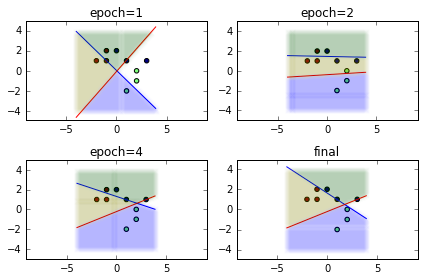

In [2]:
#--------visualize the result ------------#
def visualize(model):
    W=model.W
    plt.scatter(X[:,0],X[:,1],c=Yr)
    # two lines
    x11=np.arange(-4,4,0.1)
    x12=-(W[0,2]+W[0,0]*x11)/W[0,1]
    x21=np.arange(-4,4,0.1)
    x22=-(W[1,2]+W[1,0]*x11)/W[1,1]
    plt.plot(x11,x12,'b-')
    plt.plot(x21,x22,'r-')
    # section color
    for i in x11:
        for j in x21:
            y=model.forward(np.array([i,j,1]))
            if y[0]==0 and y[1]==1:
                plt.plot(i,j,'gx',alpha=0.03)
            elif y[0]==1 and y[1]==0:
                plt.plot(i,j,'bx',alpha=0.03)
            elif y[0]==1 and y[1]==1:
                plt.plot(i,j,'yx',alpha=0.03)
    plt.axis('equal')

# initial
model = Perceptron(X.shape[1],Y.shape[1],'random')
# train 2 epoch
model.train(X,Y,learning_rate=0.5,training_epoches=1)
plt.subplot(221)
visualize(model)
plt.title('epoch=1')
# train 3 epoch
model.train(X,Y,learning_rate=0.5,training_epoches=1)
plt.subplot(222)
visualize(model)
plt.title('epoch=2')
# train 5 epoch
model.train(X,Y,learning_rate=0.5,training_epoches=2)
plt.subplot(223)
visualize(model)
plt.title('epoch=4')
# train finished
model.train(X,Y,learning_rate=0.5,training_epoches=10)
plt.subplot(224)
visualize(model)
plt.title('final')

plt.tight_layout()
plt.show()

Problem three
=============

Suppose the output of each neuron in a multilayer quadratic perceptron(MLQP) network is  
$ x_{kj} = f(\sum_{i=1}^{N_{k-1}} (u_{kji}x_{k-1,i}^2 + v_{kji}x_{k-1,i}) + b_{kj}) $

### 1. Derive the back-propagation algorithms for MLQPs in both on-line learning and batch learnig ways.


   __a. on-line learning__:   
   the formula can be vectorized as:　　
   
   $ x_k = f(x_{k-1}^2 U_k + x_{k-1}V_k＋b_k) $
   
   （$x_{k-1}$ shape : $１\times N_{k-1}$, $x_k$ shape : $１\times N_k$, $U_k$ and $V_k$ shape : $N_{k-1}\times N_k$, $b_k$ shape: $1 \times N_k $ ）  
   
   Let $t_k= x_{k-1}^2 U_k + x_{k-1}V_{k} + b_k $  
   
   Then: 
   
   $\frac{\partial x_k}{\partial t_k} = f(t_k)*(1-f(t_k)),\  f(t_k)=\frac{1}{1+e^{-t_k}}$

   $ \frac{\partial x_k}{\partial U_k} = \frac{\partial f(t_k)}{\partial t_k}*\frac{\partial t_k}{\partial U_k} = (x_{k-1}^2)^T \times \frac{\partial f(t_k)}{\partial t_k}$

   $ \frac{\partial x_k}{\partial V_k} = \frac{\partial f(t_k)}{\partial t_k}*\frac{\partial t_k}{\partial V_k} = (x_{k-1})^T \times \frac{\partial f(t_k)}{\partial t_k}$
    
   $ \frac{\partial x_k}{\partial b_k} = \frac{\partial f(t_k)}{\partial t_k} $

   $ \frac{\partial x_k}{\partial x_{k-1}} = \frac{\partial f(t_k)}{\partial t_k}*\frac{\partial t_k}{\partial x_{k-1}} = (\frac{\partial f(t_k)}{\partial t_k} \times U_k^T )* 2 * x_{k-1} + \frac{\partial f(t_k)}{\partial t_k} \times V_k^T $

   __b. batch learning:__   
   set x=[$x_1$,...,$x_{N_k}$, 1], that is adding 1 to the end of each instance, then b can be replaced with U[-1:,:]+V[-1:,:].    
    
   Just like the on-line learning.  
    
   the formula can be vectorized as:　　
    
   $ x_k = f(x_{k-1}^2 U_k + x_{k-1}V_k) $
   
   ($x_{k-1}$ shape : $n\times (N_{k-1}+1)$, $x_k$ shape : $n\times (N_k+1)$, $U_k$ and $V_k$ shape : $(N_{k-1}+1)\times (N_k+1)$, $b_k$ shape: $n \times (N_k+1) $ ）  
    
   $ \frac{\partial x_k}{\partial t_k},  \frac{\partial x_k}{\partial U_k}, \frac{\partial x_k}{\partial V_k}, \frac{\partial x_k}{\partial x_{k-1}} $ are totally the same as on-line learning.     
    
*************************************************************
    
### 2. Implement the on-line learning back-propagation algorithms for training MLQPs with one hidden layer.

In [3]:
#------------ on-line learning for MLQPs -----------#
import numpy as np

# quadratic perceptron
class QP:
    def __init__(self,n_input,n_output):
        self.U=np.random.uniform(0,1,(n_input,n_output))
        self.V=np.random.uniform(0,1,(n_input,n_output))
        self.b=np.ones((1,n_output))
        self.one=np.ones(shape=self.b.shape)
        
    def forward(self,x):
        # x: the input data (1 x n_input)
        t=np.dot(x**2,self.U)+np.dot(x,self.V)+self.b
        self.y=1/(1+np.exp(-t))
        return self.y
    
    def backward(self,x,gy,lr):
        # gy: the gradient of y (1 x n_output) lr:learning_rate, for updating the parameterse
        gt=gy*self.y*(self.one-self.y) 

        gx=np.dot(gt,self.U.T)*2*x + np.dot(gt,self.V.T)
        gU=np.dot((x**2).T,gt)
        gV=np.dot(x.T,gt)
        gb=gt
        
        # update parameteres
        self.U=self.U-lr*gU
        self.V=self.V-lr*gV
        self.b=self.b-lr*gb
        
        return gx

# MLQPs
class MLQPs:
    def __init__(self,n_input,n_output,n_hidden=10):
        self.qp1=QP(n_input,n_hidden)
        self.qp2=QP(n_hidden,n_output)

    def forward(self,x):
        h=self.qp1.forward(x)
        pred=self.qp2.forward(h)
        return h,pred 
    
    def train(self,X,Y,learning_rate=0.05,training_epoches=1500,display_epoch=500):
        for epoch in np.arange(training_epoches):
            for i in range(X.shape[0]):
                x = X[i:(i+1),:] # on-line. training 1 instance each loop.
                y = Y[i:(i+1),:]
                # forward
                h,pred = self.forward(x)
                # L2 
                diff = pred-y
                cost = np.linalg.norm(diff)
                # backward
                # out layer
                gh = self.qp2.backward(h,diff,learning_rate)
                # hidden layer
                self.qp1.backward(x,gh,learning_rate)
            if cost<0.02:
                print 'Finished!  epoch: %d' % epoch,'cost: %f' % cost
                return 0
            if epoch % display_epoch == 0:
                print 'epoch: %d' % epoch,'cost: %f' % cost
        return 0

### 3.  Run program to classify the two-spiral problem and compare the training time and generalization performance of different learning rates.

In [6]:
# load data
# train
train_path='../two_spiral_train.txt'
train_data=np.loadtxt(train_path)
X=train_data[:,:2]
Y=train_data[:,-1:]
# test
test_path='../two_spiral_test.txt'
test_data=np.loadtxt(test_path)
X_test=test_data[:,:2]
Y_test=test_data[:,-1:]

for learning_rate in [0.5, 0.1, 0.05, 0.01]:
    print '------------learning rate = %f ---------------' % learning_rate
    # training
    mlqps=MLQPs(n_input=X.shape[1],n_output=Y.shape[1],n_hidden=10) # the number of hidden unitss can be set to 10
    mlqps.train(X,Y,learning_rate=learning_rate,training_epoches=1e4, display_epoch=1000)

    # test
    _,pred=mlqps.forward(X_test)
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
    correct=np.sum(pred==Y_test)
    acc=float(correct)/Y_test.shape[0]
    print 'test accuracy:',str(acc*100),'%'

------------learning rate = 0.500000 ---------------
epoch: 0 cost: 0.999987
epoch: 1000 cost: 0.028363
Finished!  epoch: 1850 cost: 0.020000
test accuracy: 100.0 %
------------learning rate = 0.100000 ---------------
epoch: 0 cost: 0.999991
epoch: 1000 cost: 0.097828
epoch: 2000 cost: 0.053405
epoch: 3000 cost: 0.040808
epoch: 4000 cost: 0.034269
epoch: 5000 cost: 0.030097
epoch: 6000 cost: 0.027136
epoch: 7000 cost: 0.024890
epoch: 8000 cost: 0.023110
epoch: 9000 cost: 0.021654
test accuracy: 100.0 %
------------learning rate = 0.050000 ---------------
epoch: 0 cost: 0.999994
epoch: 1000 cost: 0.136385
epoch: 2000 cost: 0.058733
epoch: 3000 cost: 0.040923
epoch: 4000 cost: 0.031757
epoch: 5000 cost: 0.025976
epoch: 6000 cost: 0.022432
epoch: 7000 cost: 0.020146
Finished!  epoch: 7078 cost: 0.020000
test accuracy: 100.0 %
------------learning rate = 0.010000 ---------------
epoch: 0 cost: 0.999995
epoch: 1000 cost: 0.999993
epoch: 2000 cost: 0.999990
epoch: 3000 cost: 0.999983
epoch: 

**************************
In the program above, we test the MLQPs with four diffrent learning rate: **0.5, 0.1, 0.05, 0.01**  

And the result show:   
1. the training time increases along with the decreasing of the learning rate.    

2. The generalization performance of different learning rates are approximately good at test data.  

***************************
** Visualize the reuslt **

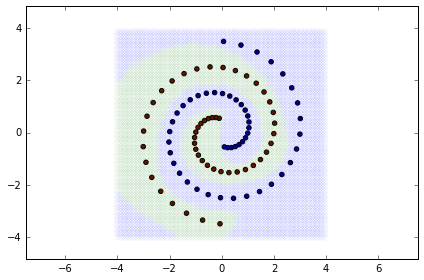

In [7]:
# ----------- visualize the result ---------------#

x1=np.arange(-4,4,0.1)
x2=x1

for i in x1:
    for j in x2:
        _,y=mlqps.forward(np.array([i,j]))
        if y>=0.5:
            plt.plot(i,j,'gx',alpha=0.1)
        else:
            plt.plot(i,j,'bx',alpha=0.1)

plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
plt.axis('equal')
plt.tight_layout()
plt.show()

** The background color: green is the predicted 1 class, blue is the predicted 0 class. **  
** The dot color: red are the 1 class in test data, blue is the 0 class in test data **
***************************

Next is the **batch learning** implementation of MLQPs. Just out of interest.   

In [40]:
#------------ batch learning for MLQPs -----------#
import numpy as np

class QP:
    def __init__(self,n_input,n_output):
        self.U=np.random.uniform(0,1,(n_input,n_output))
        self.V=np.random.uniform(0,1,(n_input,n_output))
        self.one=np.ones((n_output))
        
    def forward(self,x):
        # x: 1 x n_input
        t=np.dot(x**2,self.U)+np.dot(x,self.V)
        self.s=1/(1+np.exp(-t))
        y=self.s
        return y
    
    def backward(self,x,gy,lr):
        # gt: 1 x n_output
        gt=gy*self.s*(self.one-self.s) #1 x n_output
        #print 'gt', gt.shape, 'V',self.V.T.shape,'x',x.shape
        gx=np.dot(gt,self.U.T)*2*x + np.dot(gt,self.V.T)
        gU=np.dot((x**2).T,gt) # n_input x 1 and 1 x n_output -->n_i x n_o
        gV=np.dot(x.T,gt)
        
        #update
        self.U=self.U-lr*gU
        self.V=self.V-lr*gV
        
        return gx
        
class MLQPs:
    def __init__(self,d,c,n_hidden=10):
        #self.W=np.random.uniform(0,1,(c,d+1))  # cxd
        self.qp1=QP(d+1,n_hidden)
        self.qp2=QP(n_hidden,c)

    def forward(self,x): #nxd
        h=self.qp1.forward(x)
        pred=self.qp2.forward(h)
        return h,pred 
    
    def train(self,X,Y,batch_size=10,learning_rate=0.05,training_epoches=2000):
        print batch_size,learning_rate
        n=X.shape[0]
        X=np.hstack((X,np.ones((n,1)))) 
        batch_num=n/batch_size
        for epoch in range(training_epoches):
            for i in range(batch_num):
                x= X[i*batch_size:(i+1)*batch_size,:]
                y= Y[i*batch_size:(i+1)*batch_size,:]
                h,pred = self.forward(x) 
                diff = pred-y
                cost = np.linalg.norm(diff)
                # out layer
                gh = self.qp2.backward(h,diff,learning_rate)
                # hidden layer
                self.qp1.backward(x,gh,learning_rate)
            if epoch%500==0:
                print 'epoch: %d' % epoch,'cost: %f' % cost

In [41]:
# train
train_path='../two_spiral_train.txt'
train_data=np.loadtxt(train_path)
X=train_data[:,:2]
Y=train_data[:,-1:]
print X.shape,Y.shape

mlqps=MLQPs(d=2,c=1)
mlqps.train(X,Y,batch_size=8, learning_rate=0.1,training_epoches=2000)

# test
test_path='../two_spiral_test.txt'
test_data=np.loadtxt(test_path)
X_test=test_data[:,:2]
Y_test=test_data[:,-1:]
X_test=np.hstack((X_test,np.ones((X_test.shape[0],1))))

_,pred=mlqps.forward(X_test)
pred[pred>=0.5]=1
pred[pred<0.5]=0
correct=np.sum(pred==Y_test)
acc=float(correct)/Y_test.shape[0]

print 'test accuracy with batch learning : ',str(acc*100),'%'

(96, 2) (96, 1)
8 0.1
epoch: 0 cost: 1.999409
epoch: 500 cost: 0.161884
epoch: 1000 cost: 0.111915
epoch: 1500 cost: 0.091780
test accuracy with batch learning :  100.0 %


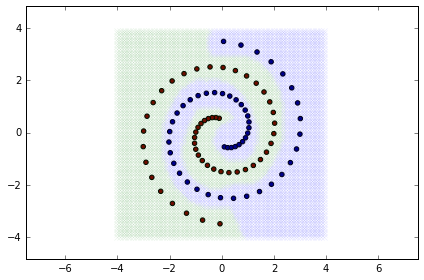

In [42]:
# ----------- visualize the result ---------------#
x1=np.arange(-4,4,0.1)
x2=x1

for i in x1:
    for j in x2:
        _,y=mlqps.forward(np.array([i,j,1]))
        if y>=0.5:
            plt.plot(i,j,'gx',alpha=0.1)
        else:
            plt.plot(i,j,'bx',alpha=0.1)

plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
plt.axis('equal')
plt.tight_layout()
plt.show()